In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from nninst.backend.tensorflow.attack.common import intra_class_similarity

In [2]:
threshold = 0.5
attack_name = "original"

In [4]:
name = "alexnet_imagenet"
label = "import"
class_to_similarity = {}
for class_id in range(0, 1000, 100):
    similarity = intra_class_similarity(
            name=name,
            threshold=threshold,
            class_id=class_id,
            attack_name=attack_name,
            label=label,
            example_trace_fn=None,
            image_ids=None,
    ).load()
    class_to_similarity[str(class_id)] = similarity[np.tri(similarity.shape[0], similarity.shape[1], k=-1, dtype=bool)]
df = pd.DataFrame(class_to_similarity)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
0      45 non-null float64
100    45 non-null float64
200    45 non-null float64
300    45 non-null float64
400    45 non-null float64
500    45 non-null float64
600    45 non-null float64
700    45 non-null float64
800    45 non-null float64
900    45 non-null float64
dtypes: float64(10)
memory usage: 3.6 KB


In [5]:
similarity_col = np.concatenate([df[str(class_id)] 
                                 for class_id in range(0, 1000, 100)])
class_col = np.concatenate([[str(class_id)] * len(df[str(class_id)])
                            for class_id in range(0, 1000, 100)])
plot_df = pd.DataFrame({"Similarity": similarity_col, "Class": class_col})
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
Similarity    450 non-null float64
Class         450 non-null object
dtypes: float64(1), object(1)
memory usage: 7.1+ KB


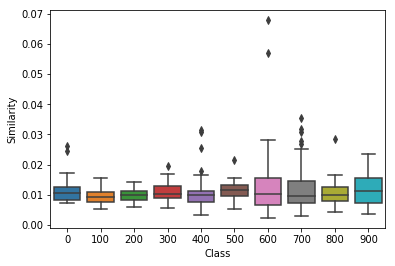

In [7]:
ax = sns.boxplot(x="Class", y="Similarity", data=plot_df)
